# 5 小提琴图Violinplot
小提琴图允许可视化一个或多个组的数字变量的分布。它与箱形图非常接近，但可以更深入地了解密度。小提琴图特别适用于数据量巨大且无法显示个别观察结果的情况。在seaborn中使用violinplot函数绘制小提琴图，该章节主要内容有：
1. 基础小提琴图绘制 Basic violinplot
2. 小提琴图样式自定义 Custom seaborn violinplot
3. 小提琴图颜色自定义 Control color of seaborn violinplot
4. 分组小提琴图 Grouped violinplot
5. 小提琴图组的顺序设置 Control order of groups in violinplot
6. 显示小提琴图上的观察次数 Show number of observation on violinplot

In [1]:
#调用seaborn
import seaborn as sns
#调用seaborn自带数据集
df = sns.load_dataset('iris')
#显示数据集
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. 基础小提琴图绘制 Basic violinplot
+ 单个变量 One numerical variable only
+ 包含多个分组的单个变量 One variable and several groups
+ 多个变量 Several variables
+ 水平小提琴图 Horizontal violinplot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


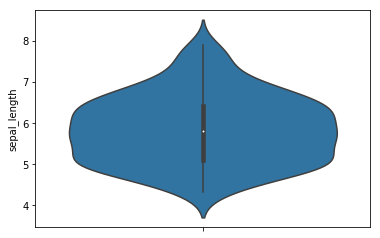

In [2]:
# 单个变量 One numerical variable only
# 如果只有一个数值变量，则最好制作直方图或密度图，但是仍然可以用小提琴图来表示
# Make boxplot for one group only
sns.violinplot( y=df["sepal_length"] );

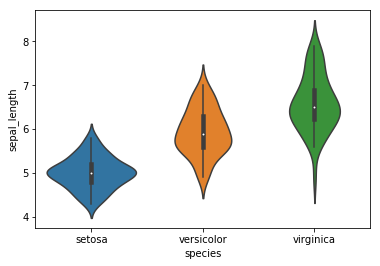

In [3]:
# 包含多个分组的单个变量 One variable and several groups
# x为种类名，y为花萼长度
sns.violinplot( x=df["species"], y=df["sepal_length"] );

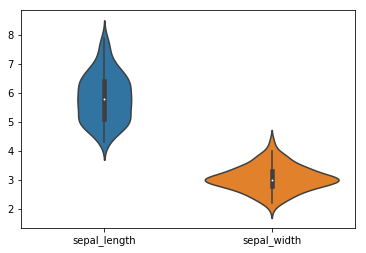

In [4]:
# 多个变量 Several variables
# 单独拿出sepal_length和sepal_width绘制
sns.violinplot(data=df.iloc[:,0:2]);

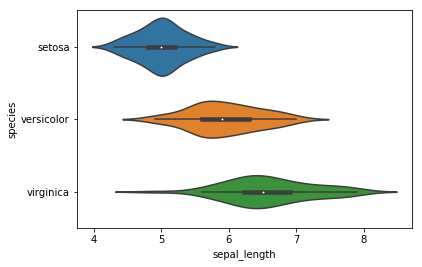

In [5]:
# 水平小提琴图 Horizontal violinplot
# 可以通过orient设定方向，但是交换x,y画水平小提琴图更好
# Just switch x and y
sns.violinplot( y=df["species"], x=df["sepal_length"] );

## 2. 小提琴图样式自定义 Custom seaborn violinplot
+ 线宽自定义 Change line width
+ 图像一般宽度自定义 Change width

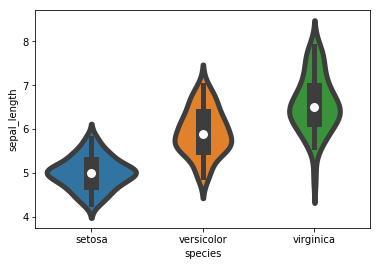

In [6]:
# 线宽自定义 Change line width
sns.violinplot( x=df["species"], y=df["sepal_length"], linewidth=5);

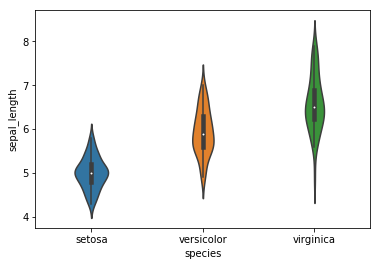

In [7]:
# 图像一般宽度自定义 Change width
sns.violinplot( x=df["species"], y=df["sepal_length"], width=0.3);

## 3. 小提琴图颜色自定义 Control color of seaborn violinplot
+ 使用调色板 Use a color palette
+ 单种颜色 Uniform color
+ 指定每个组的颜色 Specify color of each group
+ 突出显示一个组 Highlight a group

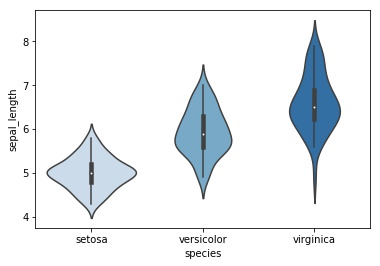

In [8]:
# 使用调色板 Use a color palette
sns.violinplot( x=df["species"], y=df["sepal_length"], palette="Blues");

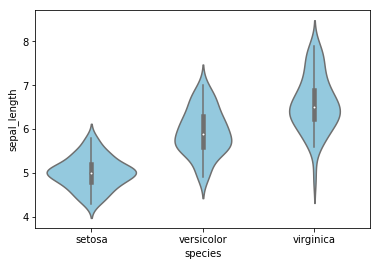

In [9]:
# 单种颜色 Uniform color
sns.violinplot( x=df["species"], y=df["sepal_length"], color="skyblue");

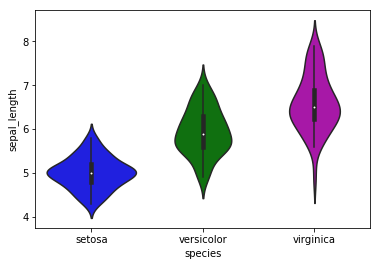

In [10]:
# 指定每个组的颜色 Specify color of each group
# Make a dictionary with one specific color per group:
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
#plot it
sns.violinplot( x=df["species"], y=df["sepal_length"], palette=my_pal);

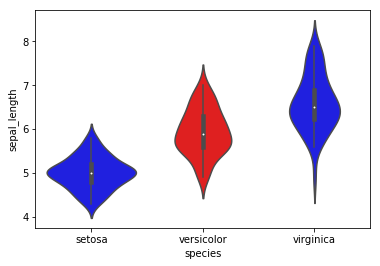

In [11]:
# 突出显示一个组 Highlight a group
# make a vector of color: red for the interesting group, blue for others:
my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()} 
# make the plot
sns.violinplot( x=df["species"], y=df["sepal_length"], palette=my_pal);

## 4. 分组小提琴图 Grouped violinplot

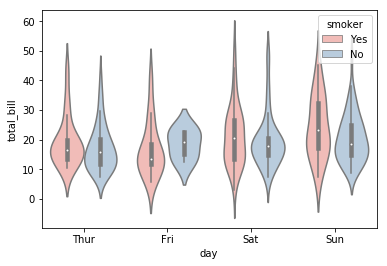

In [12]:
# 如果您有一个变量，变量有几个组和子组，您可能需要制作一个分组的小提琴图。
df_test = sns.load_dataset('tips')
# Grouped violinplot 分组
sns.violinplot(x="day", y="total_bill", hue="smoker", data=df_test, palette="Pastel1");

## 5. 小提琴图组的顺序设置 Control order of groups in violinplot

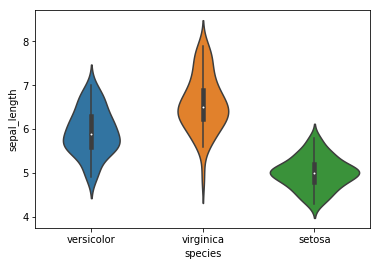

In [13]:
# plot order设置顺序就行
sns.violinplot(x='species', y='sepal_length', data=df, order=[ "versicolor", "virginica", "setosa"]);

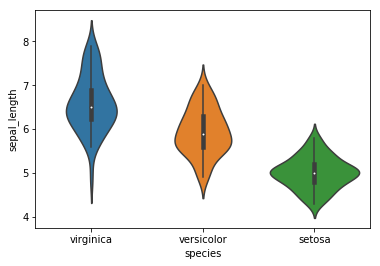

In [14]:
# Find the order 或者通过设置一定的规则排序
my_order = df.groupby(by=["species"])["sepal_length"].median().iloc[::-1].index
# Give it to the violinplot
sns.violinplot(x='species', y='sepal_length', data=df, order=my_order);

## 6. 显示小提琴图上的观察次数 Show number of observation on violinplot

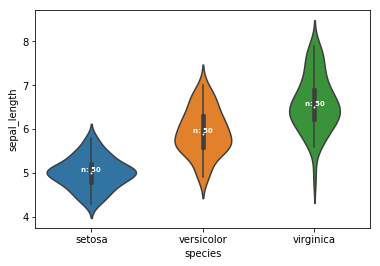

In [15]:
# Basic violinplot 基础小提琴图像绘制
ax = sns.violinplot(x="species", y="sepal_length", data=df)
 
# Calculate number of obs per group & median to position labels 计算各个样本数量
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot 加入图像
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold');